In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
da = pd.read_csv('nhanes_2015_2016.csv')

In [4]:
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [5]:
da.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

In [6]:
da.shape

(5735, 28)

In [22]:
da.DMDEDUC2.value_counts().iloc[:].sum() == da.shape[0]

False

In [25]:
pd.isna(da.DMDEDUC2).sum()

261

In [26]:
da.DMDEDUC2

0       5.0
1       3.0
2       3.0
3       5.0
4       4.0
       ... 
5730    3.0
5731    5.0
5732    4.0
5733    1.0
5734    5.0
Name: DMDEDUC2, Length: 5735, dtype: float64

In [27]:
da['DMDEDUC2x'] = da.DMDEDUC2.replace({1: '<9', 2: '9-11', 3: 'HS/GED', 4: 'Some college/AA', 5: 'College', 
                                       7: 'Refused', 9: 'Don\'t know'})

da.DMDEDUC2x.value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

In [30]:
da['RIAGENDRx'] = da.RIAGENDR.replace({1: 'Male', 2: 'Female'})

da.RIAGENDRx.value_counts()

Female    2976
Male      2759
Name: RIAGENDRx, dtype: int64

In [36]:
da.RIAGENDRx.value_counts() / da.shape[0]

Female    0.518919
Male      0.481081
Name: RIAGENDRx, dtype: float64

In [38]:
total_dmdeduc = da.DMDEDUC2x.value_counts()

total_dmdeduc /= total_dmdeduc.sum()

print(total_dmdeduc)

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64


In [42]:
da['DMDEDUC2x'] = da.DMDEDUC2x.fillna('Missing')

total_dmdeduc = da.DMDEDUC2x.value_counts()
total_dmdeduc /= total_dmdeduc.sum()

print(total_dmdeduc)

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64


In [50]:
bp_sys = (da.BPXSY1 >= 120) & (da.BPXSY1 <= 139)

In [51]:
bp_diasys = (da.BPXDI1 >= 80) & (da.BPXDI1 <= 89)

In [52]:
print((bp_diasys | bp_sys).mean() *  100)

43.17349607672188


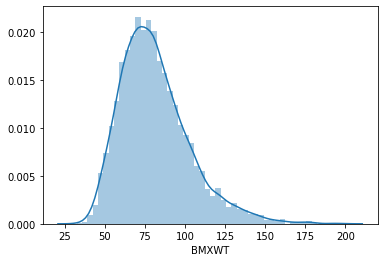

In [54]:
sns.distplot(da.BMXWT)

Text(0, 0.5, 'Blood pressure in mm/Hg')

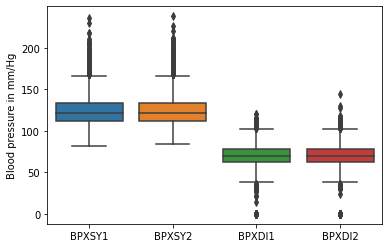

In [63]:
bp = sns.boxplot(data=da.loc[:, ['BPXSY1', 'BPXSY2', 'BPXDI1', 'BPXDI2']])
bp.set_ylabel('Blood pressure in mm/Hg')

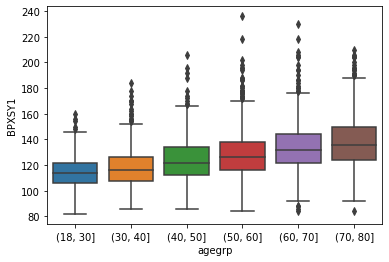

In [70]:
da['agegrp'] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
sns.boxplot(x=da['agegrp'], y=da.BPXSY1, data=da)

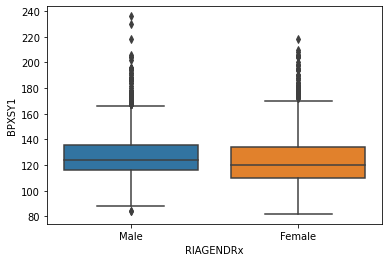

In [73]:
sns.boxplot(x=da.RIAGENDRx, y=da.BPXSY1, data=da)

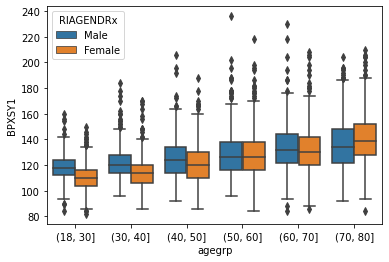

In [74]:
sns.boxplot(x=da['agegrp'], y=da.BPXSY1, hue=da.RIAGENDRx, data=da)

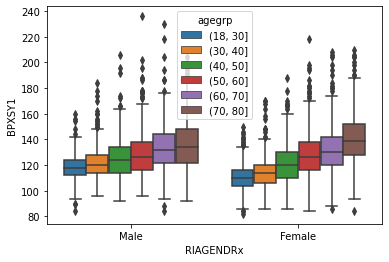

In [75]:
sns.boxplot(x=da.RIAGENDRx, y=da.BPXSY1, hue=da.agegrp, data=da)

In [79]:
da.groupby('agegrp')['DMDEDUC2x'].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
(60, 70]  Some college/AA    238
          HS/GED             192
          College            188
          <9                 149
          9-11               111
(70, 80]  Some college/AA    217
          HS/GED             184
          <9                 164
          College

In [94]:
dx = da.loc[~da.DMDEDUC2x.isin(['Don\'t know', 'Missing']), :]
dx = dx.groupby(['agegrp', 'RIAGENDRx'])['DMDEDUC2x']
dx = dx.value_counts()
dx = dx.unstack()
dx = dx.apply(lambda x: x / x.sum(), axis=1)
print(dx)

DMDEDUC2x               9-11        <9   College    HS/GED  Some college/AA
agegrp   RIAGENDRx                                                         
(18, 30] Female     0.079566  0.048825  0.282098  0.215190         0.374322
         Male       0.116525  0.042373  0.258475  0.250000         0.332627
(30, 40] Female     0.088608  0.097046  0.314346  0.164557         0.335443
         Male       0.150655  0.102620  0.251092  0.227074         0.268559
(40, 50] Female     0.109562  0.105578  0.298805  0.173307         0.312749
         Male       0.142145  0.112219  0.274314  0.209476         0.261845
(50, 60] Female     0.117021  0.102128  0.244681  0.234043         0.302128
         Male       0.147577  0.123348  0.231278  0.242291         0.255507
(60, 70] Female     0.117914  0.188209  0.195011  0.206349         0.292517
         Male       0.135011  0.151030  0.233410  0.231121         0.249428
(70, 80] Female     0.105134  0.224939  0.149144  0.239609         0.281174
         Mal